In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Changing Colorspaces

For color conversion, cv2.cvtColot(image, flag) is used, where flag determines the type of conversion.

In [2]:
[i for i in dir(cv2) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

>  For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

##### Object Tracking

In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object

In [10]:
img = cv2.imread('images/tiger.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
hue.shape


(194, 259)

In [21]:
#Change the paramater to zero if you only have one camera
cap = cv2.VideoCapture(1)

while(1):
    
    _, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([10, 100, 100])
    upper_red = np.array([179, 255, 255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

##### How to find HSV values to track

In [22]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Remeber to change HSV ranges. In OpenCV H has values from 0 to 180, S and V from 0 to 255.

In [16]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

### Geometric Transformations of Images

Two important opencv functions for transformations:
- **cv2.warpAffine()**: takes a 2 x 3 transformation matrix
- **cv2.warpPerspective**: takes a 3 x 3 transformation matrix

##### Scaling

Scaling is just resizing of the image. OpenCV  comes with a function cv2.resize(). The size of the image can be specified manually or you can specify the scaling factor. 
Interpolation Methods:

**cv2.INTER_AREA** for shrinking
**cv2.INTER_CUBIC** and **cv2.INTER_AREA** for ZOOMING

Default **cv2.INTER_LINEAR**

In [34]:
res = cv2.resize(img, None, fx = 3, fy = 2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('img',img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
res.shape

(388, 777, 3)

fx and fy are the scaling factor

In [35]:
height, width = img.shape[:2]
res = cv2.resize(img, (3*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Translation

is the shifting of object's location

m = [[1, 0, tx]. [0, 1, ty]] where tx and ty location of x and y after translation

In [41]:
M = np.float32([[1, 0, 10], [0, 1, 50]])
cols, rows = img.shape[:2]
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

> Third Argument of cv2.warpAffine() is the size of the output image, which should be (width, height). 

##### Rotation

In [46]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Affine Transformation

In Affine transformation all parallel lines in the original image will still be parallel in the output image. To find the tranformation matrix, we need three points from input image and their corresponding locations in output image. cv2.getAffineTransform will create a 2 x 3 matrix which is to be passed to cv2.warpAffine()

Text(0.5,1,'Output')

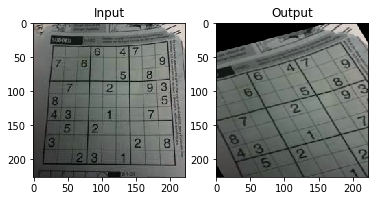

In [52]:
img = cv2.imread('images/sudoku.jpg')
rows, cols, ch = img.shape

pos1 = np.float32([[50, 50], [200, 50], [50, 200]])
pos2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pos1, pos2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

##### Perspective Transformation

For Perspective Transformation you need 3 x 3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the oupur inage. Among these 4, 3 of them should be collinear. Transormation Matrix can be found by cv2.getPerspectiveTransform().

Text(0.5,1,'Output')

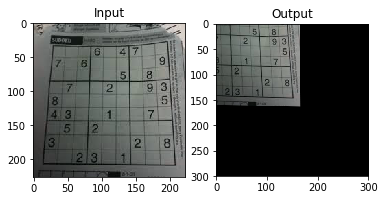

In [56]:
pos1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pos2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pos1, pos2)

dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')